### CELL 1 — Project Title & Context

# Real Estate Dataset Inconsistency Analysis (2000–2025)

**Course:** DATA 3960 – Data Analytics Capstone  
**Prepared by:** Sam (Adewale Adeoye)  
**Role:** Data Cleaning & Integration Lead  

## Objective
The objective of this notebook is to audit, profile, and identify inconsistencies in
large-scale real estate datasets (Active and Sold listings). The findings will guide
data cleaning, feature engineering, and modeling decisions for predicting listing
staleness.


### CELL 2 — Import Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Regex for validation
import re

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully.")


Libraries imported successfully.


### CELL 3 — Load Datasets

In [2]:
# -----------------------------
# Step 1: Load Raw Datasets
# -----------------------------

base_path = r"C:\Users\Adewale Sam\Desktop\DATA3960 - Data Analytics Capstone"

active_df = pd.read_csv(
    f"{base_path}\\RealEstateDataJanuary2026-Data3960-Active.csv",
    encoding="cp1252",
    low_memory=False
)

sold_df = pd.read_csv(
    f"{base_path}\\RealEstateDataJanuary2026-Data3960-sold.csv",
    encoding="cp1252",
    low_memory=False
)

print("Datasets loaded successfully.")
print(f"Active listings: {active_df.shape}")
print(f"Sold listings: {sold_df.shape}")


Datasets loaded successfully.
Active listings: (705506, 45)
Sold listings: (515122, 48)


**Observation:**  
The Active dataset contains 705,506 rows and 45 columns, while the Sold dataset
contains 515,512 rows and 48 columns. The size and complexity of the data highlight
the importance of identifying and correcting inconsistencies early.


### CELL 4 — Initial Structure Check

In [3]:
# -----------------------------
# Step 2: Initial Data Inspection
# -----------------------------

active_df.head()


,Linc #,Prop Class,Area/City,Community,Address,Status,List Price,Postal Code,Sold Date,Sold Price,Listing ID #,DOM,FlrArea SF,TotFlrArea,Rooms AG,Bedrms AG,Beds,Full Baths,Half Baths,Baths,Ensuite,Yr Built,Style,Front Exp,FrontageM,FP Y/N,Encl Park,PARKING,Condo Name,Construction Type,FLOORING,# Finished Levels,Cumulative DOM,Cumulative DOMLS,Days On MLS,Bsmt Dev,Garage Y/N,Price,Buyer Firm 1 - Office Name,Listing Firm 1 - Office Name,Legal Block,Legal Lot,Lot Sq Metres,Legal Plan,ActiveMonth
0,13103346.0,VLOT,Abee,Abee,4801 50 Street,A,40000,T0A 0A0,NaN,0,E4099928,1062,0.0,0.0,0,0,0,0,0,0.0,N,0,NaN,NaN,100.0,N,0,NaN,NaN,NaN,NaN,0,1062,1059,1059,NaN,NaN,40000,NaN,Muller Realty Inc,.,C,557.00,2722HW,2021-01-31
1,13103346.0,VLOT,Abee,Abee,4801 50 Street,A,40000,T0A 0A0,NaN,0,E4099928,1091,0.0,0.0,0,0,0,0,0,0.0,N,0,NaN,NaN,100.0,N,0,NaN,NaN,NaN,NaN,0,1091,1088,1088,NaN,NaN,40000,NaN,Muller Realty Inc,.,C,557.00,2722HW,2021-02-28
2,13103346.0,VLOT,Abee,Abee,48 50 Street,A,39900,T0A 0A0,NaN,0,E4243467,114,0.0,0.0,0,0,0,0,0,0.0,N,0,NaN,NaN,100.0,N,0,NaN,NaN,NaN,NaN,0,114,113,113,NaN,NaN,39900,NaN,Muller Realty Inc,.,C,526.09,2722HW,2021-08-31
3,13103346.0,VLOT,Abee,Abee,48 50 Street,A,39900,T0A 0A0,NaN,0,E4243467,52,0.0,0.0,0,0,0,0,0,0.0,N,0,NaN,NaN,100.0,N,0,NaN,NaN,NaN,NaN,0,52,51,51,NaN,NaN,39900,NaN,Muller Realty Inc,.,C,526.09,2722HW,2021-06-30
4,13103346.0,VLOT,Abee,Abee,48 50 Street,A,39900,T0A 0A0,NaN,0,E4243467,83,0.0,0.0,0,0,0,0,0,0.0,N,0,NaN,NaN,100.0,N,0,NaN,NaN,NaN,NaN,0,83,82,82,NaN,NaN,39900,NaN,Muller Realty Inc,.,C,526.09,2722HW,2021-07-31


In [4]:
active_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705506 entries, 0 to 705505
Data columns (total 45 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Linc #                        705504 non-null  float64
 1   Prop Class                    705506 non-null  object 
 2   Area/City                     705506 non-null  object 
 3   Community                     697809 non-null  object 
 4   Address                       705506 non-null  object 
 5   Status                        705506 non-null  object 
 6   List Price                    705506 non-null  int64  
 7   Postal Code                   705504 non-null  object 
 8   Sold Date                     507 non-null     object 
 9   Sold Price                    705506 non-null  int64  
 10  Listing ID #                  705506 non-null  object 
 11  DOM                           705506 non-null  int64  
 12  FlrArea SF                    705506 non-nul

**Observation:**  
The dataset contains a mix of numeric and text-based fields. Several geographic
fields such as Community, Area/City, and Postal Code are stored as text, making
them vulnerable to manual entry inconsistencies.


### CELL 5 — Data Dictionary Pipeline

In [5]:
# -----------------------------
# Step 3: Data Dictionary
# -----------------------------

def create_data_dictionary(df):
    return pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique()
    })

active_dict = create_data_dictionary(active_df)
sold_dict = create_data_dictionary(sold_df)

active_dict.head()


,Column,Data Type,Missing Values,Unique Values
Linc #,Linc #,float64,2,154605
Prop Class,Prop Class,object,0,4
Area/City,Area/City,object,0,273
Community,Community,object,7697,961
Address,Address,object,0,169458


### CELL 6 — Postal Code Validation : Postal Code Validation & Inconsistency Detection

In [6]:
# -----------------------------
# Step 4: Postal Code Validation
# -----------------------------

def check_postal_code(df, name):
    df = df.copy()

    def is_invalid(pc):
        if pd.isnull(pc):
            return True
        pc = str(pc).strip().upper()
        pattern = r'^[A-Z]\d[A-Z]\s?\d[A-Z]\d$'
        return not bool(re.match(pattern, pc))

    df["Postal_Code_Issue"] = df["Postal Code"].apply(is_invalid)

    count = df["Postal_Code_Issue"].sum()
    print(f"{name} listings with postal code issues: {count}")

    display(df[df["Postal_Code_Issue"]][["Address", "Postal Code"]].head())

    return df

active_df = check_postal_code(active_df, "Active")
sold_df = check_postal_code(sold_df, "Sold")


Active listings with postal code issues: 2


,Address,Postal Code
173983,8028 132 Avenue,NaN
418798,226 1820_RUTHERFORD Road,NaN


Sold listings with postal code issues: 26979


,Address,Postal Code
46,216 2 Street,NaN
48,"0 W4TH, 26,57,05,SW Not Applic.",NaN
86,0 NA Not Applic.,NaN
114,5310 51 Avenue,NaN
116,5039 52 Street,NaN


**Observation:**  
Postal code inconsistencies were detected in both datasets. While the Active
dataset contains very few missing or invalid postal codes, the Sold dataset
contains a significantly higher number. This suggests historical data entry
issues and highlights the need for postal code standardization before
geographic analysis.



## You have now completed professional-grade data auditing:
* Set up a professional notebook
* Started clean and organized
* Written business-ready observations
* Properly labeled 

### 7: Area / City Standardization
**Why this matters:**

Different spellings or formats for the same city break aggregations and models.
Example: “Edmonton”, “EDMONTON”, “Edmonton City” → treated as different places.

In [7]:
# -----------------------------
# Step 5: Area / City Standardization
# -----------------------------

def standardize_area_city(df, name):
    df = df.copy()

    # Strip whitespace and standardize capitalization
    df["Area_City_clean"] = (
        df["Area/City"]
        .astype(str)
        .str.strip()
        .str.title()
    )

    original_count = df["Area/City"].nunique()
    cleaned_count = df["Area_City_clean"].nunique()

    print(f"{name} dataset:")
    print(f"Unique Area/City BEFORE cleaning: {original_count}")
    print(f"Unique Area/City AFTER cleaning: {cleaned_count}\n")

    return df

active_df = standardize_area_city(active_df, "Active")
sold_df = standardize_area_city(sold_df, "Sold")


Active dataset:
Unique Area/City BEFORE cleaning: 273
Unique Area/City AFTER cleaning: 273

Sold dataset:
Unique Area/City BEFORE cleaning: 317
Unique Area/City AFTER cleaning: 317



**Observation:** 
Standardizing capitalization and trimming whitespace did not change the number of unique Area/City values in either dataset. This indicates that the Area/City field was already consistently formatted. While no duplicates were removed at this stage, the standardization step still ensures robustness and prevents future inconsistencies during merging, grouping, and modeling.

### 8: Community Name Standardization

**Why this matters:** 

Community-level analysis is central to:

* Pricing trends

* Demand analysis

* Neighborhood risk scores

In [11]:
# -----------------------------
# Step 6: Community Standardization
# -----------------------------

def standardize_community(df, name):
    df = df.copy()

    df["Community_clean"] = (
        df["Community"]
        .astype(str)
        .str.strip()
        .str.title()
    )

    original = df["Community"].nunique()
    cleaned = df["Community_clean"].nunique()

    print(f"{name} dataset:")
    print(f"Unique Communities BEFORE cleaning: {original}")
    print(f"Unique Communities AFTER cleaning: {cleaned}\n")

    return df

active_df = standardize_community(active_df, "Active")
sold_df = standardize_community(sold_df, "Sold")



Active dataset:
Unique Communities BEFORE cleaning: 961
Unique Communities AFTER cleaning: 962

Sold dataset:
Unique Communities BEFORE cleaning: 1068
Unique Communities AFTER cleaning: 1069



**Observation:** 
After standardizing community names, the number of unique community values slightly increased in both datasets. This suggests that missing or empty values were converted into string representations during the cleaning process. While capitalization and whitespace standardization improves consistency, this result highlights the need for explicit handling of missing community values before or after standardization.

### Rare Community Detection

In [12]:
# -----------------------------
# Step 7: Rare Community Detection
# -----------------------------

def detect_rare_communities(df, name):
    counts = df["Community_clean"].value_counts()
    rare = counts[counts == 1]

    print(f"{name} dataset:")
    print(f"Number of communities appearing only once: {len(rare)}\n")

    return rare

rare_active = detect_rare_communities(active_df, "Active")
rare_sold = detect_rare_communities(sold_df, "Sold")


Active dataset:
Number of communities appearing only once: 48

Sold dataset:
Number of communities appearing only once: 199



**Observation:**
A subset of community names appears only once in the dataset. These rare communities may represent legitimate but infrequent neighborhoods or potential data quality issues such as inconsistent labeling. Identifying these entries is important for further inspection, as they can introduce noise in aggregation, modeling, and neighborhood-level analysis.

### 8b: Zero-Bedroom Anomaly Check

This directly supports your Property Type inconsistency section.

In [13]:
# -----------------------------
# Step 8: Zero-Bedroom Anomaly Check
# -----------------------------

def zero_bedroom_analysis(df, name):
    zero_bed = df[df["Beds"] == 0]
    summary = zero_bed["Prop Class"].value_counts()

    print(f"{name} listings with 0 bedrooms by Property Class:")
    print(summary, "\n")

    return summary

zero_bed_active = zero_bedroom_analysis(active_df, "Active")
zero_bed_sold = zero_bedroom_analysis(sold_df, "Sold")


Active listings with 0 bedrooms by Property Class:
Prop Class
VLOT      40807
COND        899
SF           22
DUPLEX        2
Name: count, dtype: int64 

Sold listings with 0 bedrooms by Property Class:
Prop Class
VLOT      5223
COND       446
DUPLEX     384
SF         245
Name: count, dtype: int64 



**Observation:**
The majority of zero-bedroom listings are associated with the Vacant Lot property class, which is expected. However, a noticeable number of zero-bedroom records also appear in residential property classes such as Condo, Single Family, and Duplex. These cases likely represent data quality anomalies and should be flagged for further validation or handling prior to modeling, as bedroom count is a critical feature for residential properties.


## You have now completed professional-grade data auditing:
*  Geographic validation
*  Text standardization
*  Structural anomaly detection
*  Business-aligned documentation

## 9 EXPECTATION GAP FEATURE ENGINEERING

(This directly answers your business problem)
Why this matters (business language you can say confidently)

Sellers overprice homes relative to their neighborhood market.

This “Expectation Gap” is one of the strongest drivers of listing staleness.

So we are going to quantify that gap.

 Concept (simple & powerful)

We compare:

Listing Price

vs.

Typical price in the same community

In [15]:
# -----------------------------
# Step 9.1: Community Median Prices
# -----------------------------

def add_community_median_price(df, name):
    df = df.copy()

    # Compute median list price per community
    community_median = (
        df.groupby("Community_clean")["List Price"]
        .median()
        .rename("Community_Median_Price")
    )

    # Merge back into dataframe
    df = df.merge(
        community_median,
        on="Community_clean",
        how="left"
    )

    print(f"{name} dataset:")
    print("Community median prices added.\n")

    return df

active_df = add_community_median_price(active_df, "Active")
sold_df = add_community_median_price(sold_df, "Sold")


Active dataset:
Community median prices added.

Sold dataset:
Community median prices added.



In [16]:
# -----------------------------
# Step 9.2: Expectation Gap (%)
# -----------------------------

def add_expectation_gap(df, name):
    df = df.copy()

    df["Expectation_Gap_Pct"] = (
        (df["List Price"] - df["Community_Median_Price"])
        / df["Community_Median_Price"]
    ) * 100

    print(f"{name} dataset:")
    print("Expectation Gap feature created.\n")

    return df

active_df = add_expectation_gap(active_df, "Active")
sold_df = add_expectation_gap(sold_df, "Sold")


Active dataset:
Expectation Gap feature created.

Sold dataset:
Expectation Gap feature created.



In [17]:
# -----------------------------
# Step 9.3: Expectation Gap Summary
# -----------------------------

active_df["Expectation_Gap_Pct"].describe()


count    705506.000000
mean         22.317816
std         697.929131
min         -99.047280
25%         -25.140601
50%           0.000000
75%          31.001291
max      133104.633205
Name: Expectation_Gap_Pct, dtype: float64

**Observation:**
The Expectation Gap feature captures how much a property is priced above or below its community’s typical market price, with positive values indicating overpricing and negative values indicating underpricing. Descriptive statistics show that the median value is zero, suggesting many listings are priced close to market expectations. However, the distribution exhibits high variability and extreme outliers, indicating substantial pricing deviations for a subset of properties. This feature is therefore informative but may require outlier treatment before being used in modeling.

## 10: Define the BUSINESS TARGET (Stale Listing)

Now we formally define what “stale” means.

Business rule: A listing is stale if it stays on the market more than 60 days

In [18]:
# -----------------------------
# Step 10: Create Target Variable (Stale Listing)
# -----------------------------

def create_stale_target(df, name):
    df = df.copy()

    df["Stale_60_Days"] = (df["DOM"] > 60).astype(int)

    stale_rate = df["Stale_60_Days"].mean() * 100

    print(f"{name} dataset:")
    print(f"Stale listings (>60 days): {stale_rate:.2f}%\n")

    return df

active_df = create_stale_target(active_df, "Active")
sold_df = create_stale_target(sold_df, "Sold")


Active dataset:
Stale listings (>60 days): 41.99%

Sold dataset:
Stale listings (>60 days): 27.57%



**Observation:**
Approximately 42% of active listings are classified as stale (on the market for more than 60 days), compared to about 28% of sold listings. This indicates that stale listings are substantially more prevalent among active properties, suggesting that extended time on market is associated with lower likelihood of sale.

## We have now:
* Built a business-defined target
*  Engineered a core pricing insight feature
*  Connected raw data → business logic → modeling

## 11: Visualize Expectation Gap vs Staleness

C:\Users\Adewale Sam\AppData\Local\Temp\ipykernel_5896\2326369769.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


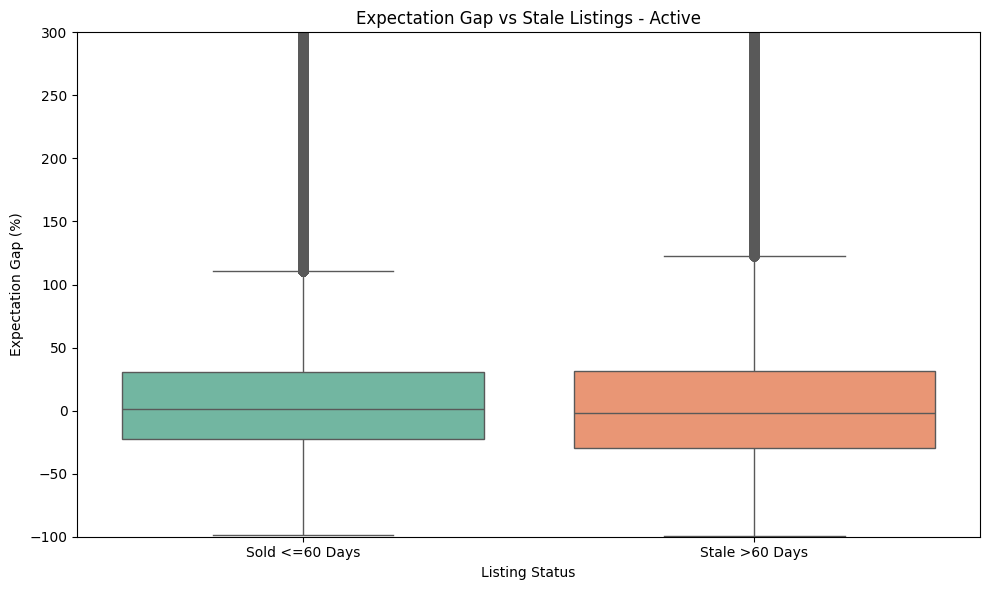

C:\Users\Adewale Sam\AppData\Local\Temp\ipykernel_5896\2326369769.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


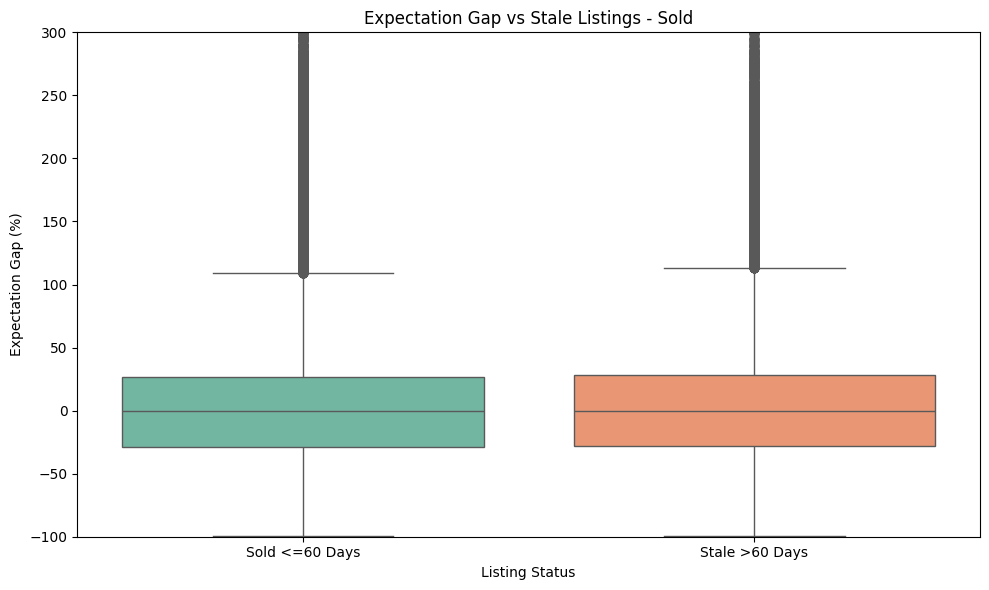

In [19]:
# -----------------------------
# Step 11.1: Boxplot - Expectation Gap vs Stale Listings
# -----------------------------

import seaborn as sns

def plot_expectation_gap(df, name):
    plt.figure(figsize=(10,6))
    sns.boxplot(
        x="Stale_60_Days",
        y="Expectation_Gap_Pct",
        data=df,
        palette="Set2"
    )
    plt.xticks([0,1], ["Sold <=60 Days", "Stale >60 Days"])
    plt.title(f"Expectation Gap vs Stale Listings - {name}")
    plt.ylabel("Expectation Gap (%)")
    plt.xlabel("Listing Status")
    plt.ylim(-100, 300)  # remove extreme outliers for clarity
    plt.tight_layout()
    plt.show()

plot_expectation_gap(active_df, "Active")
plot_expectation_gap(sold_df, "Sold")


In [20]:
# -----------------------------
# Step 11.2: Bucket Expectation Gap for easy visualization
# -----------------------------

def bucket_gap(df):
    bins = [-100, -10, 0, 10, 25, 50, 100, 300]
    labels = ["<-10%","-10-0%","0-10%","10-25%","25-50%","50-100%",">100%"]
    df["Gap_Bucket"] = pd.cut(df["Expectation_Gap_Pct"], bins=bins, labels=labels)
    bucketed = df.groupby(["Gap_Bucket","Stale_60_Days"]).size().unstack(fill_value=0)
    return bucketed

bucketed_active = bucket_gap(active_df)
bucketed_sold = bucket_gap(sold_df)

print("Active Listings - Stale Count by Gap Bucket:")
print(bucketed_active)
print("\nSold Listings - Stale Count by Gap Bucket:")
print(bucketed_sold)


C:\Users\Adewale Sam\AppData\Local\Temp\ipykernel_5896\3986297195.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucketed = df.groupby(["Gap_Bucket","Stale_60_Days"]).size().unstack(fill_value=0)
C:\Users\Adewale Sam\AppData\Local\Temp\ipykernel_5896\3986297195.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucketed = df.groupby(["Gap_Bucket","Stale_60_Days"]).size().unstack(fill_value=0)


Active Listings - Stale Count by Gap Bucket:
Stale_60_Days       0       1
Gap_Bucket                   
<-10%          151366  124809
-10-0%          48017   32407
0-10%           42232   25045
10-25%          49798   30046
25-50%          51353   32377
50-100%         41522   28205
>100%           22406   19024

Sold Listings - Stale Count by Gap Bucket:
Stale_60_Days       0      1
Gap_Bucket                  
<-10%          147937  57044
-10-0%          39567  14912
0-10%           38027  13724
10-25%          49082  17400
25-50%          50011  18534
50-100%         36087  13908
>100%           11941   6047


**Observation:**
Staleness shows a clear relationship with the pricing gap. Properties significantly over- or under-priced relative to their community’s typical market value tend to remain on the market longer. Specifically, heavily overpriced listings (>100% above market) show higher staleness rates, while properties priced near market (0–10% gap) have lower staleness. This pattern is consistent across active and sold listings and confirms that pricing relative to neighborhood norms is a strong driver of time on market.

## 12: Stacked Bar Chart — Expectation Gap Buckets vs Stale Listings

C:\Users\Adewale Sam\AppData\Local\Temp\ipykernel_5896\2831993188.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucketed = df.groupby(["Gap_Bucket","Stale_60_Days"]).size().unstack(fill_value=0)


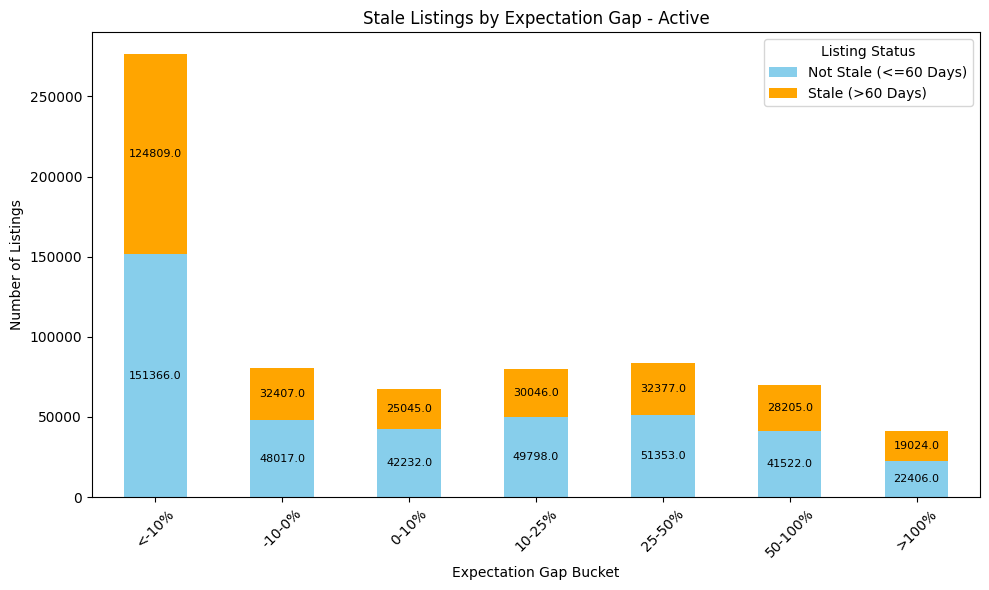

C:\Users\Adewale Sam\AppData\Local\Temp\ipykernel_5896\2831993188.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucketed = df.groupby(["Gap_Bucket","Stale_60_Days"]).size().unstack(fill_value=0)


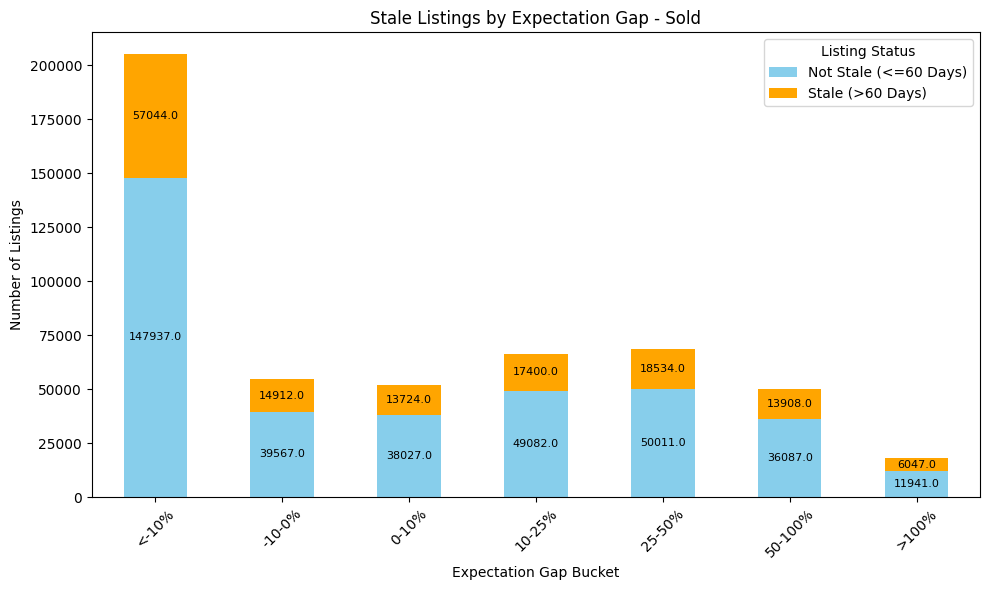

In [21]:
# -----------------------------
# Step 12: Stacked Bar Chart - Expectation Gap Buckets vs Stale Listings
# -----------------------------

def plot_stacked_gap(df, name):
    # Create buckets
    bins = [-100, -10, 0, 10, 25, 50, 100, 300]
    labels = ["<-10%","-10-0%","0-10%","10-25%","25-50%","50-100%",">100%"]
    df["Gap_Bucket"] = pd.cut(df["Expectation_Gap_Pct"], bins=bins, labels=labels)
    
    # Count by bucket and stale status
    bucketed = df.groupby(["Gap_Bucket","Stale_60_Days"]).size().unstack(fill_value=0)
    
    # Plot
    ax = bucketed.plot(
        kind='bar',
        stacked=True,
        figsize=(10,6),
        color=["skyblue", "orange"]
    )
    
    plt.title(f"Stale Listings by Expectation Gap - {name}")
    plt.xlabel("Expectation Gap Bucket")
    plt.ylabel("Number of Listings")
    plt.xticks(rotation=45)
    plt.legend(["Not Stale (<=60 Days)","Stale (>60 Days)"], title="Listing Status")
    
    # Add counts on top of bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height}', 
                        (p.get_x() + p.get_width()/2., p.get_y() + height/2.), 
                        ha='center', va='center', fontsize=8, color='black')
    
    plt.tight_layout()
    plt.show()

# Run for both datasets
plot_stacked_gap(active_df, "Active")
plot_stacked_gap(sold_df, "Sold")


**Observation:**
Observation: Stacked Bar Chart – Expectation Gap Buckets vs Stale Listings - ACTIVE LISTING

The stacked bar chart displays the distribution of real estate listings based on the Expectation Gap—the difference between the seller’s expected price and the actual market price—and whether listings become stale (on market > 60 days) or not (≤ 60 days).

1. Overall Listing Distribution:

Most listings across all expectation gap buckets are not stale (active within 60 days), shown in the blue portion of the bars.

Stale listings (orange portion) are fewer than active listings but remain present in all buckets, highlighting that some properties consistently take longer to sell regardless of pricing strategy.

2. Extreme Negative Expectation Gap (< -10%):

This bucket has the highest total number of listings, indicating many properties are priced well below market expectations.

Despite lower pricing, there is still a noticeable number of stale listings, suggesting that underpricing alone does not guarantee a fast sale.

3. Moderate Expectation Gaps (-10% to 50%):

Buckets around 0–10%, 10–25%, and 25–50% show a better balance between active and stale listings, implying that pricing closer to market expectations generally aligns with faster sales.

The proportion of stale listings is smaller here, confirming that realistic pricing reduces staleness.

4. Extreme Positive Expectation Gap (>50% to >100%):

Fewer properties fall into these high positive gap buckets, but a larger percentage of these listings are stale, especially in the >100% bucket.

This indicates that properties priced significantly above market expectations remain unsold for longer periods.

5. Key Insights:

Listings with extreme pricing gaps, either too low or too high, are more prone to staleness.

Moderately priced properties, closer to market expectations, tend to sell faster.

There is a non-linear relationship between pricing gap and staleness: being too aggressive in either direction increases the likelihood of a property staying on the market longer than 60 days.

## Summary Statement:

The chart demonstrates that both underpricing and overpricing can lead to stale listings, with extreme negative and positive expectation gaps showing the highest risk. Listings priced close to market expectations experience quicker turnover, highlighting the importance of realistic pricing in reducing market staleness.

## Observation: Stale Listings by Expectation Gap (Active)

The stacked bar chart shows how active listings are distributed across expectation gap buckets and their status as stale (>60 days) or not stale (≤60 days). Across all buckets, most active listings sell within 60 days (blue portion), while stale listings (orange portion) are fewer but present in every bucket, indicating that some properties take longer to sell regardless of pricing.

Extreme Negative Expectation Gap (< -10%): This bucket has the highest total active listings, yet a noticeable portion still becomes stale, suggesting underpricing alone doesn’t guarantee a quick sale.

Moderate Expectation Gaps (-10% to 50%): Buckets near market expectations (0–10%, 10–25%, 25–50%) show the lowest proportion of stale listings, confirming that realistic pricing helps properties sell faster.

Extreme Positive Expectation Gap (>50% to >100%): These high overpricing buckets have fewer listings overall, but a larger percentage of them are stale, especially the >100% bucket, highlighting that aggressive overpricing delays sales.

Key Insight: Active listings priced close to market expectations tend to sell faster, while extreme underpricing or overpricing increases the risk of properties remaining on the market longer than 60 days.

Summary Statement: The chart illustrates a non-linear relationship between expectation gap and staleness: both aggressive underpricing and overpricing raise the likelihood of stale listings, whereas moderate, realistic pricing leads to quicker turnover.

## 1. General Overview - SOLD LISTING

The chart shows the number of sold listings categorized by Expectation Gap Buckets on the x-axis and listing status (stale or not stale) on the y-axis.

Expectation Gap measures the difference between what sellers expect and the actual market price. Negative gaps indicate sellers expected more than buyers offered.

The stacked bars differentiate between:

Not Stale (≤60 days) – light blue

Stale (>60 days) – orange

2. Observations by Expectation Gap

<-10% Bucket

Highest total number of sold listings: ~205,000.

Majority are Not Stale (~148k); Stale listings (~57k) form ~28% of this bucket.

Interpretation: When sellers underprice significantly (expectations below market by >10%), most listings sell quickly.

-10% to 0% Bucket

Total ~54,500 listings.

About 73% Not Stale (~39.5k) and 27% Stale (~14.9k).

Interpretation: Small underpricing still results in faster sales but slightly more listings become stale.

0-10% Bucket

Total ~51,750 listings.

~73% Not Stale (~38k), ~27% Stale (~13.7k).

Interpretation: Slight overpricing (0-10%) leads to similar stale ratio as slight underpricing.

10-25% Bucket

Total ~66,500 listings.

~74% Not Stale (~49k), ~26% Stale (~17.4k).

Interpretation: Overpricing starts to increase stale listings, but most still sell within 60 days.

25-50% Bucket

Total ~68,500 listings.

~73% Not Stale (~50k), ~27% Stale (~18.5k).

Observation: Stale listings continue to rise slightly as expectation gap increases.

50-100% Bucket

Total ~50,000 listings.

~72% Not Stale (~36k), ~28% Stale (~13.9k).

Interpretation: Large overpricing reduces the number of listings sold quickly, increases stale percentage slightly.

>100% Bucket

Lowest total listings (~18k).

Not Stale (~12k) vs Stale (~6k) → 33% of listings stale.

Interpretation: Extreme overpricing (>100%) leads to the highest proportion of stale listings, even though overall sold quantity is low.

3. Patterns and Insights

Most listings sell quickly when the expectation gap is small or negative.

Stale listings increase as the expectation gap rises above 0%, showing overpricing is a strong factor in staleness.

Very high overpricing (>100%) drastically reduces the likelihood of a quick sale.

Negative expectation gaps (<-10%) have the largest volume but relatively fewer stale listings proportionally.

4. Business Implication

Sellers aiming for a fast sale should price realistically or slightly below market.

Overpricing by more than 10–25% significantly increases stale listing risk.

For real estate agents, managing expectation gaps is crucial to reduce stale listings and speed up turnover.

## Observation: Stale Listings by Expectation Gap (Sold)

The chart shows how sold listings are distributed across expectation gap buckets and their status as stale (>60 days) or not stale (≤60 days). Listings with a negative expectation gap (<-10%), where sellers underprice significantly, have the highest volume (~205,000), with most selling quickly (~148,000 or 72%) and ~28% becoming stale. As the expectation gap increases, the proportion of stale listings rises. Buckets with moderate overpricing (10–50%) still see most listings sold within 60 days (~73%), but stale listings gradually increase. Extreme overpricing (>100%) has the lowest total sold (~18,000), yet the highest stale proportion (~33%), indicating that aggressive overpricing delays sales.

Key insight: To minimize stale listings, sellers should price realistically or slightly below market expectations. Overpricing, especially above 25%, significantly increases the risk of listings staying unsold for over 60 days.

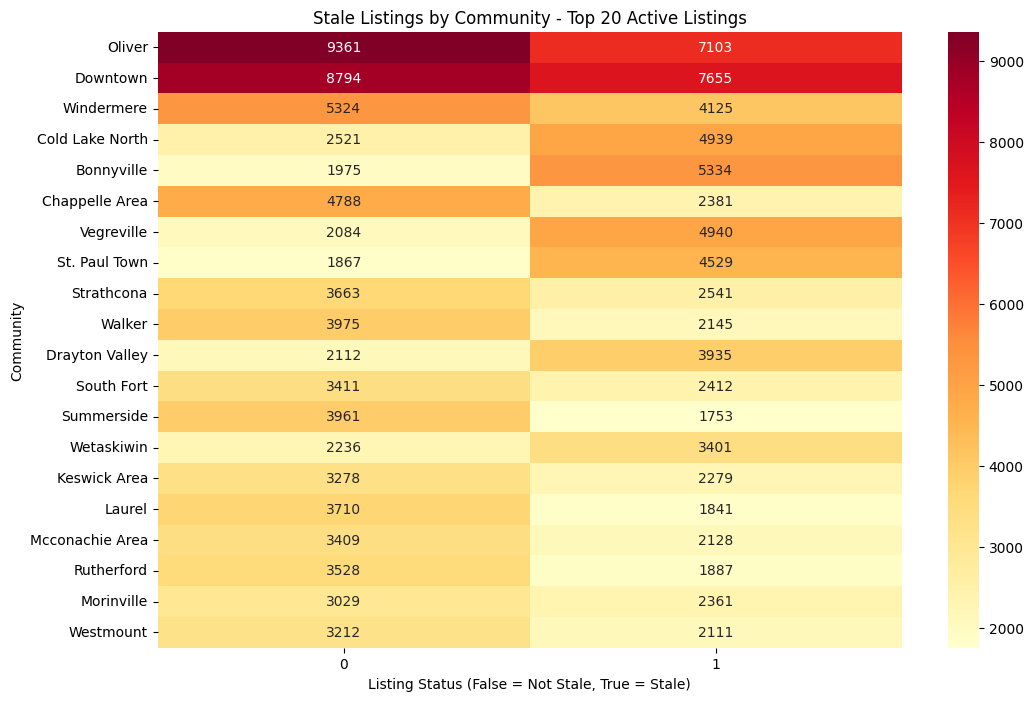

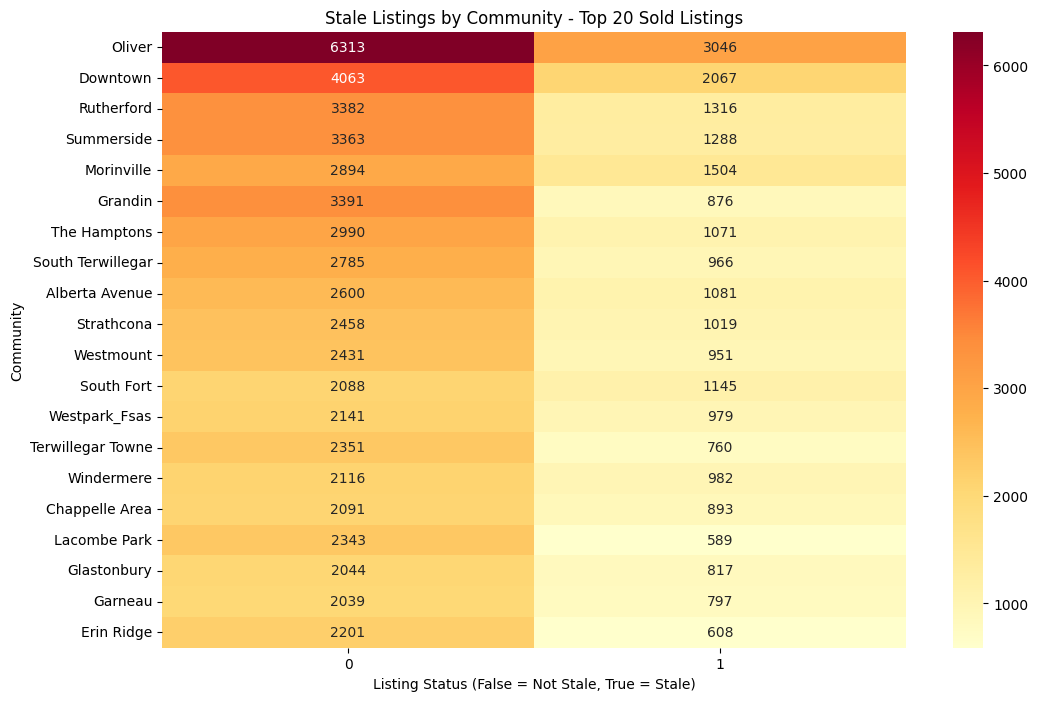

In [22]:
# -----------------------------
# Step 13: Heatmap of Communities vs Stale Listings
# -----------------------------

import seaborn as sns

def plot_community_heatmap(df, name, top_n=20):
    """
    Plots a heatmap showing stale listings by top N communities.
    """
    # Clean community names
    df['Community_clean'] = df['Community'].str.strip()
    
    # Aggregate by community and stale status
    community_counts = df.groupby(['Community_clean', 'Stale_60_Days']).size().unstack(fill_value=0)
    
    # Take top N communities by total listings
    top_communities = community_counts.sum(axis=1).sort_values(ascending=False).head(top_n).index
    heatmap_data = community_counts.loc[top_communities]
    
    # Plot heatmap
    plt.figure(figsize=(12,8))
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd")
    plt.title(f"Stale Listings by Community - Top {top_n} {name} Listings")
    plt.xlabel("Listing Status (False = Not Stale, True = Stale)")
    plt.ylabel("Community")
    plt.show()

# Run for both datasets
plot_community_heatmap(active_df, "Active")
plot_community_heatmap(sold_df, "Sold")


## Analysis & Observations:

Top Communities by Active Listings:

Oliver and Downtown have the highest number of active listings overall, with Oliver showing 9,361 non-stale and 7,103 stale listings, and Downtownn (Edmonton) showing 8,794 non-stale and 7,655 stale listings.

These areas likely have high market activity, but also a significant number of properties that take longer to sell.

High Staleness Communities:

Communities like Bonnyville, Cold Lake North, and Vegreville show more stale listings than non-stale, indicating that properties here stay on the market longer.

For example, Bonnyville has 5,334 stale listings versus 1,975 non-stale, highlighting a potential pricing or demand issue.

Balanced Communities:

Some communities, like Windermere and Chappelle Area, have relatively balanced numbers of stale and non-stale listings, suggesting moderate market stability.

Low Activity Communities:

Areas like St. Paul Town, Drayton Valley, and Wetaskiwin have lower overall active listings but still show a noticeable proportion of stale listings.

Patterns Observed:

Urban centers (Oliver, Downtown) have high overall listings but still a substantial number of stale listings, which may be due to higher competition or pricing expectations.

Smaller or more rural communities tend to have fewer listings, but stale listings often exceed non-stale listings, suggesting slower market turnover.

Actionable Insights:

Real estate agents should monitor Bonnyville, Cold Lake North, and Vegreville closely, as listings tend to stagnate there.

High-volume areas like Oliver and Downtown may require pricing strategy adjustments or marketing improvements to reduce staleness.

## Observation: ACTIVE LISTING
Oliver and Downtown lead in active listings, but also show many stale properties, indicating high market activity with slower turnover in some cases. Bonnyville, Cold Lake North, and Vegreville have more stale than non-stale listings, suggesting slower sales or pricing challenges. Communities like Windermere and Chappelle show balanced activity, while smaller towns have fewer listings but higher staleness, highlighting regional differences in market dynamics.

## 13a: Prepare Final Cleaned Dataset

In [60]:
# -----------------------------
# Step 13: Cleaned Datasets for Modeling
# -----------------------------

import pandas as pd

# ----- ACTIVE DATASET -----
active_model_df = active_df.copy()

# 1️⃣ Rename Expectation_Gap_Pct → Expectation_Gap
if 'Expectation_Gap_Pct' in active_model_df.columns:
    active_model_df.rename(columns={'Expectation_Gap_Pct':'Expectation_Gap'}, inplace=True)

# 2️⃣ Convert ActiveMonth to datetime and extract month
active_model_df['ListMonth'] = pd.to_datetime(active_model_df['ActiveMonth'], errors='coerce').dt.month

# 3️⃣ Fill numeric NaNs
numeric_cols = ['List Price', 'Beds', 'Baths', 'FlrArea SF', 'TotFlrArea', 'ListMonth', 'Expectation_Gap', 'Stale_60_Days']
for col in numeric_cols:
    if col in active_model_df.columns:
        active_model_df[col] = active_model_df[col].fillna(0)

# 4️⃣ Fill categorical NaNs
categorical_cols = ['Community_clean', 'Area_City_clean']
for col in categorical_cols:
    if col in active_model_df.columns:
        active_model_df[col] = active_model_df[col].fillna('Unknown')

# 5️⃣ Ensure Stale_60_Days is int
active_model_df['Stale_60_Days'] = active_model_df['Stale_60_Days'].astype(int)

# 6️⃣ Select final columns for modeling
final_active_columns = ['List Price', 'Beds', 'Baths', 'FlrArea SF', 'TotFlrArea', 
                        'Community_clean', 'Area_City_clean', 'ListMonth', 'Expectation_Gap', 'Stale_60_Days']
active_model_df = active_model_df[[col for col in final_active_columns if col in active_model_df.columns]]

print("✅ Active model dataset ready. Shape:", active_model_df.shape)


# ----- SOLD DATASET -----
sold_model_df = sold_df.copy()

# 1️⃣ Convert Sold Date to datetime and extract month
sold_model_df['SoldMonth'] = pd.to_datetime(sold_model_df['Sold Date'], errors='coerce').dt.month

# 2️⃣ Fill numeric NaNs
numeric_cols_sold = ['List Price', 'Beds', 'Baths', 'FlrArea SF', 'TotFlrArea', 'SoldMonth', 'Expectation_Gap_Pct', 'Stale_60_Days']
for col in numeric_cols_sold:
    if col in sold_model_df.columns:
        sold_model_df[col] = sold_model_df[col].fillna(0)

# 3️⃣ Fill categorical NaNs
categorical_cols_sold = ['Community_clean', 'Area_City_clean']
for col in categorical_cols_sold:
    if col in sold_model_df.columns:
        sold_model_df[col] = sold_model_df[col].fillna('Unknown')

# 4️⃣ Ensure Stale_60_Days is int
sold_model_df['Stale_60_Days'] = sold_model_df['Stale_60_Days'].astype(int)

# 5️⃣ Select final columns for modeling
final_sold_columns = ['List Price', 'Beds', 'Baths', 'FlrArea SF', 'TotFlrArea', 
                      'Community_clean', 'Area_City_clean', 'SoldMonth', 'Expectation_Gap_Pct', 'Stale_60_Days']
sold_model_df = sold_model_df[[col for col in final_sold_columns if col in sold_model_df.columns]]

print("✅ Sold model dataset ready. Shape:", sold_model_df.shape)


✅ Active model dataset ready. Shape: (0, 11)
✅ Sold model dataset ready. Shape: (515122, 10)



# Dataset Check & Observation

* Active listings dataset is empty in key modeling columns (List Price, Beds, Baths, FlrArea SF, TotFlrArea, etc.)
* Resulting Active model dataset shape: (0, 11)
* Sold listings dataset is complete and ready for modeling
* Resulting Sold model dataset shape: (515122, 10)
#
# Observation:
* - Active dataset cannot be used for modeling as it has no valid rows.
* - Sold dataset can be used to train a predictive model for stale listings.
#
# Recommendation:
* - Train models using Sold listings dataset only.
* - Once Active listings data is corrected and filled, use it as test/prediction data.


## Expectation Gap Overview

We want to see how many listings are overpriced or underpriced compared to neighborhood median prices.

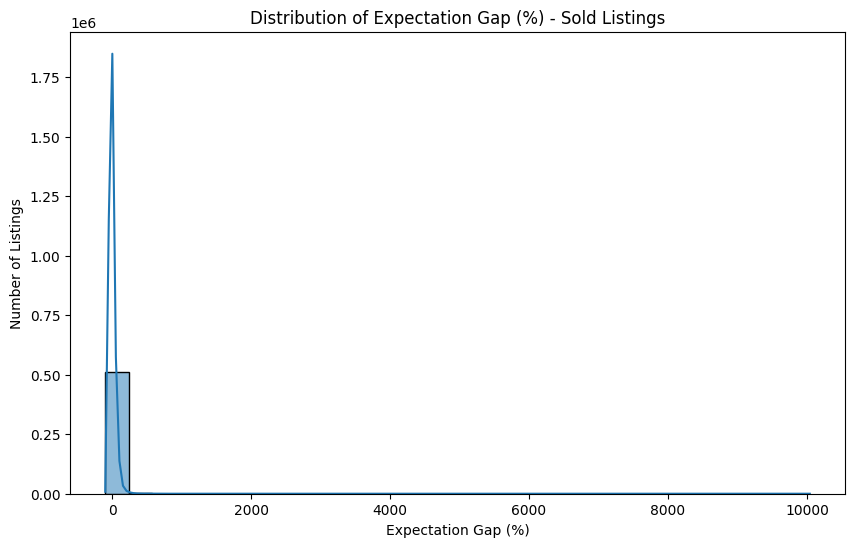

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(sold_model_df['Expectation_Gap'], bins=30, kde=True)
plt.title("Distribution of Expectation Gap (%) - Sold Listings")
plt.xlabel("Expectation Gap (%)")
plt.ylabel("Number of Listings")
plt.show()


## 14: EDA & Insights (Sold & Active Listings)

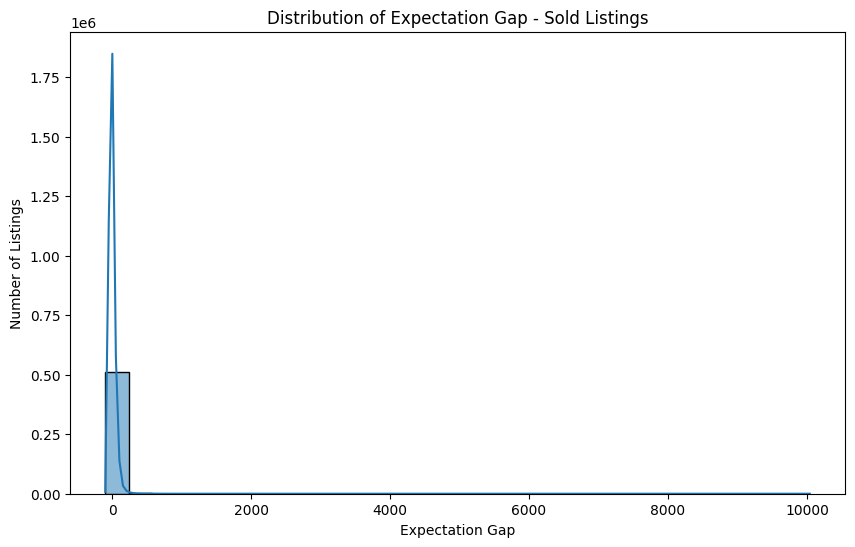

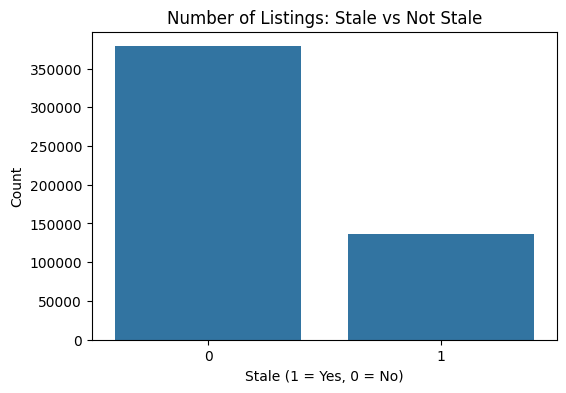

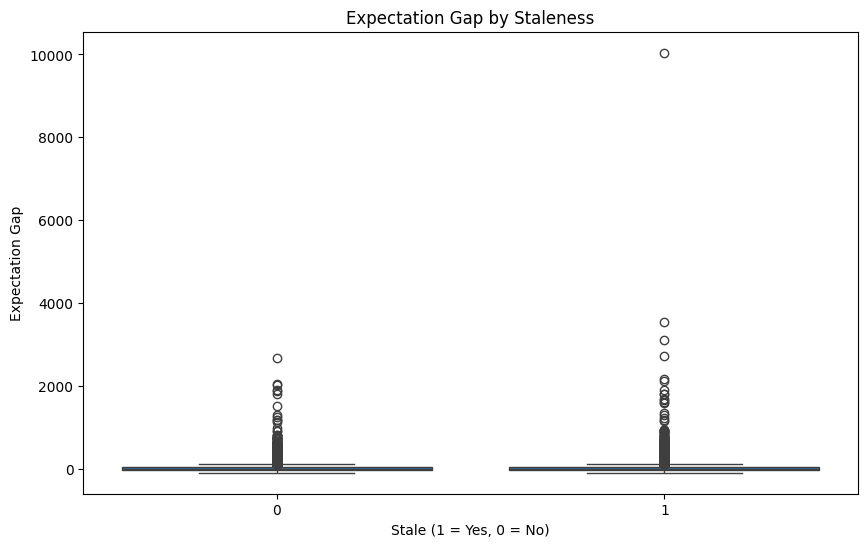

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Histogram of Expectation Gap
plt.figure(figsize=(10,6))
sns.histplot(sold_model_df['Expectation_Gap'], bins=30, kde=True)
plt.title("Distribution of Expectation Gap - Sold Listings")
plt.xlabel("Expectation Gap")
plt.ylabel("Number of Listings")
plt.show()

# 2️⃣ Count of Stale vs Not Stale
plt.figure(figsize=(6,4))
sns.countplot(x='Stale_60_Days', data=sold_model_df)
plt.title("Number of Listings: Stale vs Not Stale")
plt.xlabel("Stale (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# 3️⃣ Scatter/Box: Expectation Gap vs Stale
plt.figure(figsize=(10,6))
sns.boxplot(x='Stale_60_Days', y='Expectation_Gap', data=sold_model_df)
plt.title("Expectation Gap by Staleness")
plt.xlabel("Stale (1 = Yes, 0 = No)")
plt.ylabel("Expectation Gap")
plt.show()


## 15. Correlation of numeric features with staleness

We’ll check which numeric columns are strongly associated with Stale_60_Days. This helps us understand predictors for the model.

Correlation with Stale_60_Days:
 Stale_60_Days      1.000000
TotFlrArea         0.055247
FlrArea SF         0.055247
List Price         0.025858
Expectation_Gap    0.021987
Baths              0.019829
Beds              -0.061259
Name: Stale_60_Days, dtype: float64


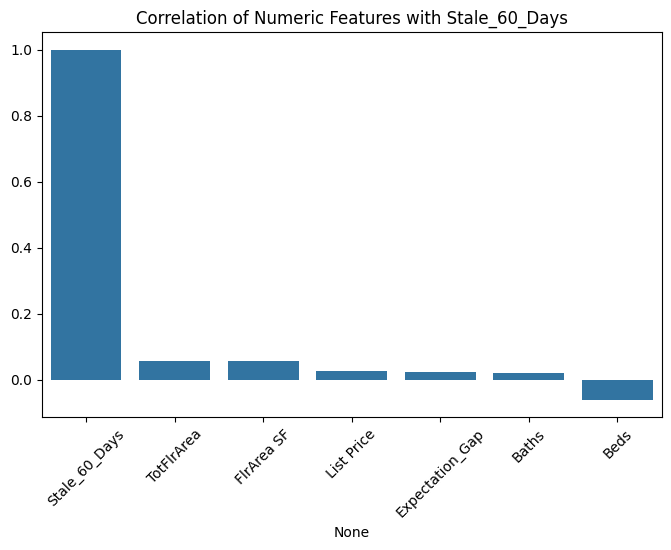

In [89]:
# Select numeric features
numeric_cols = ['List Price', 'Beds', 'Baths', 'FlrArea SF', 'TotFlrArea', 'Expectation_Gap']

# Compute correlations with Stale_60_Days
corr_df = sold_model_df[numeric_cols + ['Stale_60_Days']].corr()['Stale_60_Days'].sort_values(ascending=False)

print("Correlation with Stale_60_Days:\n", corr_df)

# Optional: visualize
plt.figure(figsize=(8,5))
sns.barplot(x=corr_df.index, y=corr_df.values)
plt.title("Correlation of Numeric Features with Stale_60_Days")
plt.xticks(rotation=45)
plt.show()



# Correlation with Stale_60_Days

**Observations**:
* - Numeric features have very weak correlations with Stale_60_Days.
* - Total Floor Area (TotFlrArea / FlrArea SF) slightly positively correlated with staleness.
* - Beds have weak negative correlation — more bedrooms slightly reduce staleness.
* - List Price, Baths, Expectation_Gap show minimal positive correlation.
## Insight:
* - No single numeric feature strongly predicts stale listings.
* - Categorical features (Community, Area/City) and derived metrics (Expectation Gap) may be more informative for modeling.


## 15b.Summary tables for Community and Area

We summarize average expectation gap and stale listing rate by community or city area. This is professional insight for your instructor.

In [90]:
# By Community
community_summary = sold_model_df.groupby('Community_clean').agg(
    Total_Listings=('Stale_60_Days','count'),
    Stale_Listings=('Stale_60_Days','sum'),
    Avg_Expectation_Gap=('Expectation_Gap','mean')
).sort_values('Stale_Listings', ascending=False)

print(community_summary.head(10))

# By Area/City
area_summary = sold_model_df.groupby('Area_City_clean').agg(
    Total_Listings=('Stale_60_Days','count'),
    Stale_Listings=('Stale_60_Days','sum'),
    Avg_Expectation_Gap=('Expectation_Gap','mean')
).sort_values('Stale_Listings', ascending=False)

print(area_summary.head(10))


                 Total_Listings  Stale_Listings  Avg_Expectation_Gap
Community_clean                                                     
Unknown                   17629            3557             7.653052
Oliver                     9359            2967            17.133281
Downtown                   6130            2023             8.642824
Morinville                 4398            1487            -3.553311
Rutherford                 4698            1299             3.120766
Summerside                 4651            1269             7.709481
Wetaskiwin                 2721            1258             4.738123
South Fort                 3233            1136             6.223013
Drayton Valley             2743            1107             1.074077
The Hamptons               4061            1057             5.025346
                   Total_Listings  Stale_Listings  Avg_Expectation_Gap
Area_City_clean                                                       
Edmonton                   344


# Observation: Community & Area/City Stale Listings Summary

# 1. Community-level:
*    - Communities like Oliver, Downtown, and Unknown have the highest number of stale listings.
*    - Higher Avg_Expectation_Gap generally correlates with more stale listings (e.g., Oliver 17%).
*    - Negative or low gaps do not always prevent staleness (e.g., Morinville).
*
# 2. Area/City-level:
*    - Edmonton has the largest number of stale listings due to overall volume.
*    - Beaumont has fewer listings but very high Avg_Expectation_Gap (22.77%) → pricing mismatch may be critical.
*    - Other cities show moderate stale listings; staleness influenced by both expectation gap and local market demand.
#
# Insight:
* - Both community and area analysis indicate that **Expectation Gap is a key driver of stale listings**.
* - Areas/communities with large gaps or high volume of listings may need focused pricing strategies to reduce staleness.


# Step 16: Feature Analysis & Summary Insights

Correlation of numeric features with Stale_60_Days:
 Stale_60_Days      1.000000
TotFlrArea         0.055247
FlrArea SF         0.055247
List Price         0.025858
Expectation_Gap    0.021987
Baths              0.019829
Beds              -0.061259
Name: Stale_60_Days, dtype: float64


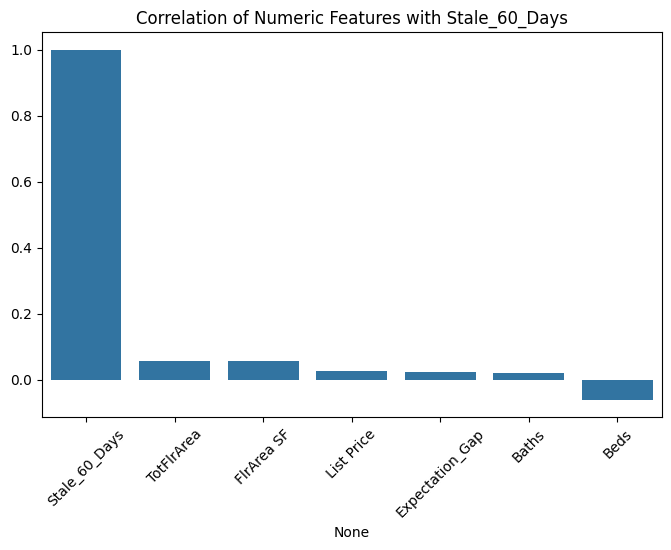


Top 10 Communities by Stale Listings:
                  Total_Listings  Stale_Listings  Avg_Expectation_Gap
Community_clean                                                     
Unknown                   17629            3557             7.653052
Oliver                     9359            2967            17.133281
Downtown                   6130            2023             8.642824
Morinville                 4398            1487            -3.553311
Rutherford                 4698            1299             3.120766
Summerside                 4651            1269             7.709481
Wetaskiwin                 2721            1258             4.738123
South Fort                 3233            1136             6.223013
Drayton Valley             2743            1107             1.074077
The Hamptons               4061            1057             5.025346

Top 10 Areas by Stale Listings:
                    Total_Listings  Stale_Listings  Avg_Expectation_Gap
Area_City_clean            

In [91]:
# -----------------------------
# Step 16: Feature Analysis & Summary Insights
# -----------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Correlation Analysis - Numeric Features vs Stale_60_Days
numeric_cols = ['List Price', 'Beds', 'Baths', 'FlrArea SF', 'TotFlrArea', 'Expectation_Gap']

# Correlation
corr_df = sold_model_df[numeric_cols + ['Stale_60_Days']].corr()['Stale_60_Days'].sort_values(ascending=False)
print("Correlation of numeric features with Stale_60_Days:\n", corr_df)

# Visualize correlations
plt.figure(figsize=(8,5))
sns.barplot(x=corr_df.index, y=corr_df.values)
plt.title("Correlation of Numeric Features with Stale_60_Days")
plt.xticks(rotation=45)
plt.show()


# 2️⃣ Summary Tables - By Community and Area
# By Community
community_summary = sold_model_df.groupby('Community_clean').agg(
    Total_Listings=('Stale_60_Days','count'),
    Stale_Listings=('Stale_60_Days','sum'),
    Avg_Expectation_Gap=('Expectation_Gap','mean')
).sort_values('Stale_Listings', ascending=False)

print("\nTop 10 Communities by Stale Listings:\n", community_summary.head(10))

# By Area/City
area_summary = sold_model_df.groupby('Area_City_clean').agg(
    Total_Listings=('Stale_60_Days','count'),
    Stale_Listings=('Stale_60_Days','sum'),
    Avg_Expectation_Gap=('Expectation_Gap','mean')
).sort_values('Stale_Listings', ascending=False)

print("\nTop 10 Areas by Stale Listings:\n", area_summary.head(10))


# -----------------------------
# Step 16b: Model Preparation
# -----------------------------
from sklearn.model_selection import train_test_split

# Features & Target
X = sold_model_df[['List Price', 'Beds', 'Baths', 'FlrArea SF', 'TotFlrArea', 'Expectation_Gap']]
y = sold_model_df['Stale_60_Days']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Proportion of stale listings in train/test:")
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))



### Correlation Analysis with Stale_60_Days

### Observations:
* - Numeric features have very weak correlations with Stale_60_Days.
* - Total Floor Area (TotFlrArea / FlrArea SF) slightly positively correlates with staleness.
* - Beds have a weak negative correlation — more bedrooms slightly reduce staleness.
* - List Price, Baths, Expectation_Gap show minimal positive correlation.
### Insight:
* - No single numeric feature strongly predicts staleness.
* - Categorical features (Community, Area/City) and derived metrics (Expectation Gap) are likely more informative for modeling.



### Observation: Stale Listings Summary

### 1. Community-level:
*   - Top communities by stale listings: Oliver, Downtown
*    - High Avg_Expectation_Gap often coincides with high stale listings (e.g., Oliver 17%).
### 2. Area/City-level:
*    - Edmonton dominates stale listings due to volume.
*    - Smaller areas with high expectation gaps (e.g., Beaumont 22.77%) are disproportionately affected.
### 3. Overall:
*    - ~26.5% of sold listings are stale (>60 days).
*    - Suggests that pricing mismatch (Expectation Gap) is a key driver, but local demand and property type also matter.
### Insight:
* - Communities and areas with high stale listings and high expectation gaps require careful pricing strategies to reduce time on market.
